In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display_html
from collections import Counter
%matplotlib inline

df = pd.read_excel('GRAB DATASET.xlsx')
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%b-%Y %I:%M%p')
df.dropna(axis=1, how='all',inplace=True)

#Only retain PH,SG, and ID
indexNames = df[(df['Country'] != 'Philippines') & (df['Country'] != 'Singapore') & (df['Country'] != 'Indonesia')].index
df.drop(indexNames, inplace=True)

#df.replace(0, np.nan, inplace=True)
#df.dropna(axis=1, how='all',inplace=True)

#This is now my aggregate base table
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9368 entries, 0 to 18760
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  9368 non-null   datetime64[ns]
 1   Headline              9368 non-null   object        
 2   URL                   9367 non-null   object        
 3   Opening Text          9240 non-null   object        
 4   Hit Sentence          9308 non-null   object        
 5   Source                9368 non-null   object        
 6   Influencer            5463 non-null   object        
 7   Country               9368 non-null   object        
 8   Language              9368 non-null   object        
 9   Reach                 9368 non-null   int64         
 10  Desktop Reach         9368 non-null   int64         
 11  Mobile Reach          9368 non-null   int64         
 12  Twitter Social Echo   9368 non-null   int64         
 13  Facebook Social E

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Language,Reach,...,Mobile Reach,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo,National Viewership,AVE,Sentiment,Key Phrases,Input Name,Keywords
0,2019-12-31 21:02:00,Grab Begins Refunding Passengers In Compliance...,https://www.cosmo.ph/news/grab-refunding-passe...,Were you one of the many Grab users who got th...,is proportionally distributing the amount of P...,Cosmopolitan Philippines,Monina Eugenio,Philippines,English,1183302,...,871371,1,28,0,0,10945.54,Neutral,"hailing app Grab,many Grab users,Begins Refund...",Adhoc Search Export,"GrabCar,GrabPay"
2,2019-12-31 20:41:00,"Digugat Rp 1,12 Miliar oleh Kedai Kopi, Grab T...",https://bisnis.tempo.co/read/1289719/digugat-r...,"TEMPO.CO, Jakarta - Manajemen PT Solusi Transp...","serta proses hukum yang akan berlangsung, ujar...",Tempo.co,Reporter: Francisca Christy Rosana,Indonesia,Indonesian,10919158,...,9652910,13,10220,0,0,101002.21,Not Rated,NaN,Adhoc Search Export,GrabFood
3,2019-12-31 19:50:00,Aplikasi Digital Tol Laut Permudah Masyarakat ...,https://akurat.co/ekonomi/id-934269-read-aplik...,AKURAT.CO Menteri Perhubungan Budi Karya Sumad...,"tol laut itu harus mudah, sama kaya kita pesan...",Akurat.co,Andi Syafriadi,Indonesia,Indonesian,1361769,...,1145444,1,0,0,0,12596.36,Not Rated,NaN,Adhoc Search Export,grabfood
7,2019-12-31 18:08:00,Grab Terkejut Digugat Merchant,http://www.24berita.com/tekno/grab-terkejut-di...,"Pihak Grab mengaku terkejut, dengan informasi ...","di Purwokerto, terkait kesalahan menu yang dit...",24berita,NaN,Indonesia,Indonesian,44697,...,42527,0,0,0,0,413.45,Not Rated,NaN,Adhoc Search Export,GrabFood
8,2019-12-31 18:04:00,Grab Terkejut Digugat Merchant,https://www.viva.co.id/digital/digilife/119416...,"VIVA – Pihak Grab mengaku terkejut, dengan inf...",laporan dengan menjalin komunikasi langsung de...,VIVAnews,Tim VIVA »,Indonesia,Indonesian,4539631,...,3950464,5,1,0,0,41991.59,Not Rated,NaN,Adhoc Search Export,GrabFood


In [2]:
#Options
pd.options.display.float_format = '{:,.2f}'.format

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

,Desktop Reach,Mobile Reach
Country,,
Philippines,"279,953","716,290"
Singapore,"408,351","910,218"
Indonesia,"2,275,672","7,826,482"
,Desktop Reach,Mobile Reach
Country,,
Philippines,"295,630,434","756,402,116"
Singapore,"1,341,024,302","2,989,154,657"
Indonesia,"11,442,080,493","39,351,552,060"


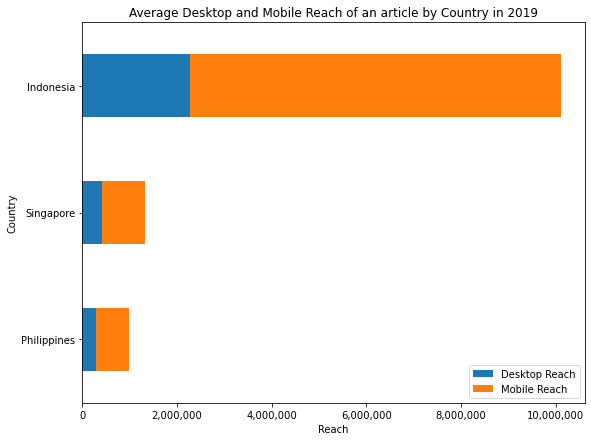

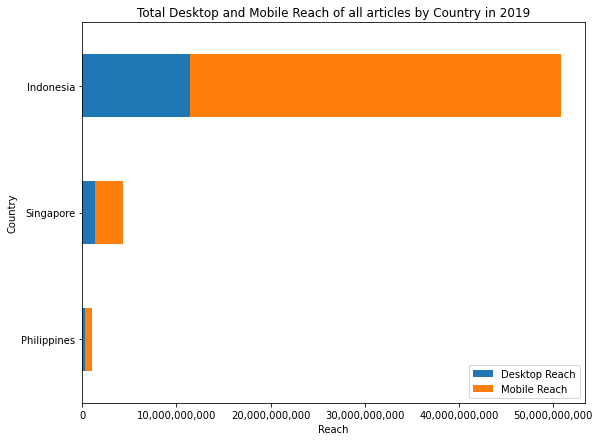

In [3]:
ave_reach = df.groupby('Country').mean()[['Desktop Reach', 'Mobile Reach']].sort_values(by=['Desktop Reach', 'Mobile Reach'])

plot_ave_reach = ave_reach.plot.barh(
title = 'Average Desktop and Mobile Reach of an article by Country in 2019',
ylabel = 'Reach',
stacked = True,
figsize = (9,7)
)

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plot_ave_reach.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Reach")

tot_reach = df.groupby('Country').sum()[['Desktop Reach', 'Mobile Reach']].sort_values(by=['Desktop Reach', 'Mobile Reach'])

plot_tot_reach = tot_reach.plot.barh(
title = 'Total Desktop and Mobile Reach of all articles by Country in 2019',
ylabel = 'Reach',
stacked = True,
figsize = (9,7)
)

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plot_tot_reach.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Reach")

reach_styler1 = tot_reach.head().style.set_table_attributes("style='display:inline'").set_caption(
    'Total Desktop and Mobile Reach of all articles').format("{:,.0f}")

reach_styler2 = ave_reach.head().style.set_table_attributes("style='display:inline'").set_caption(
    'Average Desktop and Mobile Reach of an article').format("{:,.0f}")

display_html(reach_styler2._repr_html_()+' '+reach_styler1._repr_html_(), raw=True)

,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo
Country,,,
Indonesia,2.963,185.284,0.002
Singapore,14.826,294.781,0.054
Philippines,4.993,649.922,0.013
,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo
Country,,,
Philippines,"5,273","686,318",14
Indonesia,"14,897","931,609",8
Singapore,"48,688","968,061",177


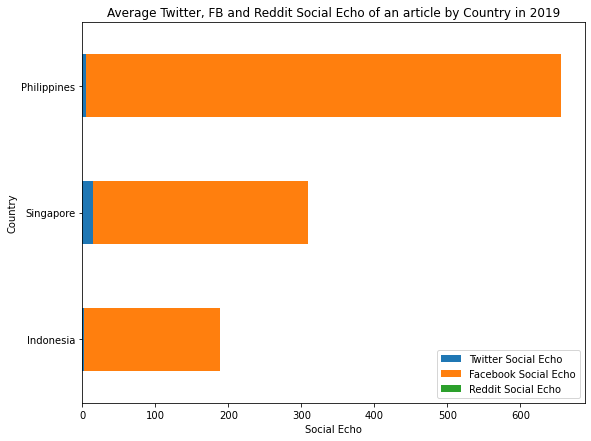

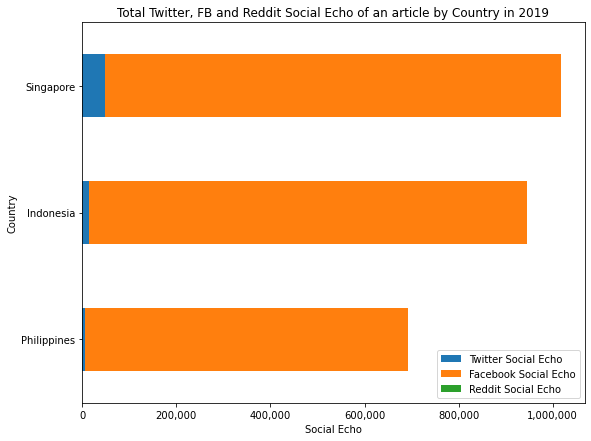

In [4]:
ave_echo = df.groupby('Country').mean()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']].sort_values(by=['Facebook Social Echo'])

plot_ave_echo = ave_echo.plot.barh(
title = 'Average Twitter, FB and Reddit Social Echo of an article by Country in 2019',
ylabel = 'Social Echo',
stacked = True,
figsize = (9,7)
)

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plot_ave_echo.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Social Echo")

tot_echo = df.groupby('Country').sum()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']].sort_values(by=['Facebook Social Echo'])

plot_ave_echo = tot_echo.plot.barh(
title = 'Total Twitter, FB and Reddit Social Echo of an article by Country in 2019',
ylabel = 'Social Echo',
stacked = True,
figsize = (9,7)
)

plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plot_ave_echo.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Social Echo")

echo_styler1 = tot_echo.head().style.set_table_attributes("style='display:inline'").set_caption(
    'Total Twitter, FB and Reddit Social Echo of all articles').format("{:,.0f}")

echo_styler2 = ave_echo.head().style.set_table_attributes("style='display:inline'").set_caption(
    'Average Twitter, FB and Reddit Social Echo of an article').format("{:,.3f}")

display_html(echo_styler2._repr_html_()+' '+echo_styler1._repr_html_(), raw=True)

,AVE
Country,
Philippines,"9,216"
Singapore,"12,199"
Indonesia,"93,450"
,AVE
Country,
Philippines,"9,732,564"
Singapore,"40,061,538"
Indonesia,"469,866,752"


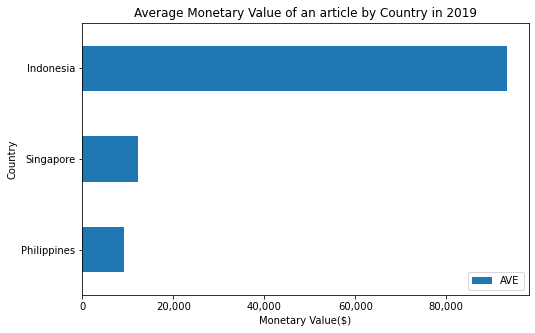

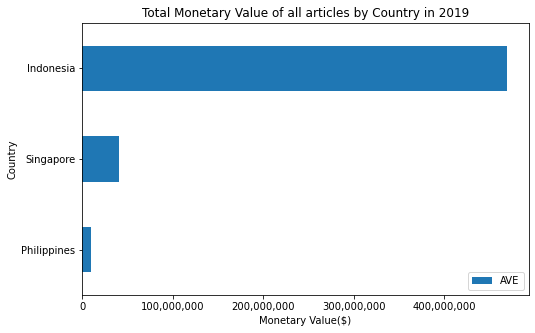

In [5]:
ave_AVE = df.groupby('Country').mean()[['AVE']].sort_values(by=['AVE'])

plot_ave_AVE = ave_AVE.plot.barh(
title = 'Average Monetary Value of an article by Country in 2019',
figsize = (8,5),
#ylabel = 'Monetary Value($)'
)

plot_ave_AVE.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Monetary Value($)")

tot_AVE = df.groupby('Country').sum()[['AVE']].sort_values(by=['AVE'])

plot_tot_AVE = tot_AVE.plot.barh(
title = 'Total Monetary Value of all articles by Country in 2019',
ylabel = 'Monetary Value($)',
figsize = (8,5)
)

plot_tot_AVE.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Monetary Value($)")

AVE_styler1 = tot_AVE.head().style.set_table_attributes("style='display:inline'").set_caption(
    'Total Monetary Value of all articles').format("{:,.0f}")

AVE_styler2 = ave_AVE.head().style.set_table_attributes("style='display:inline'").set_caption(
    'Average Monetary Value of an article').format("{:,.0f}")

display_html(AVE_styler2._repr_html_()+' '+AVE_styler1._repr_html_(), raw=True)


,,AVE
Influencer,Country,
Pingit Aria,Indonesia,"5,206,454.61"
CoconutsSingapore,Singapore,"5,530,773.34"
Tim VIVA »,Indonesia,"5,583,561.82"
Sri Noviyanti,Indonesia,"6,830,468.45"
Muchamad Nafi,Indonesia,"7,015,433.02"
Bayu Galih,Indonesia,"7,156,179.52"
Sakina Rakhma Diah Setiawan,Indonesia,"7,659,858.77"
Desy Setyowati,Indonesia,"12,326,701.86"
Lazuardhi Utama,Indonesia,"13,566,937.85"


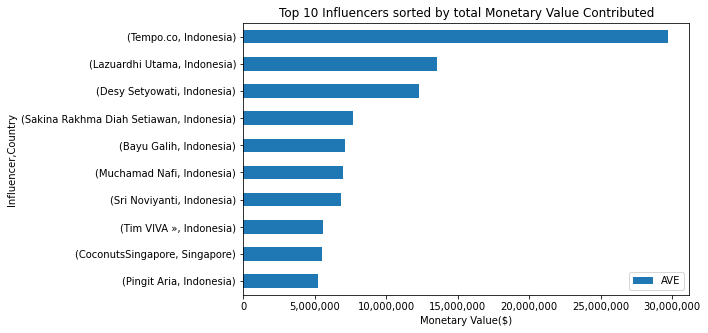

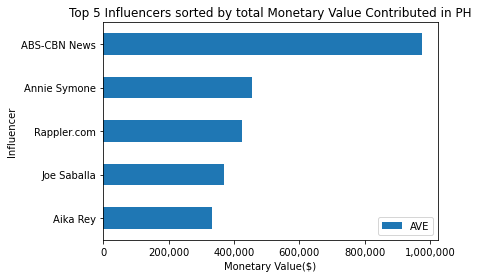

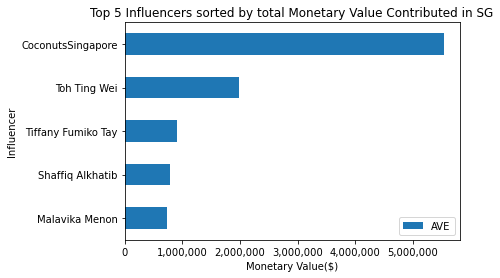

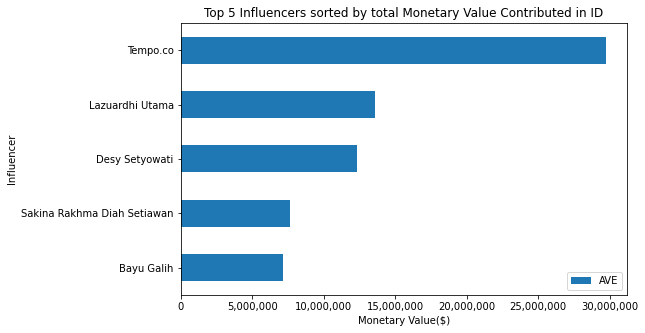

In [6]:
top_influencer = df.groupby(['Influencer','Country']).sum().sort_values(by=['AVE'], ascending=True)[['AVE']].tail(10)

plot_top_influencer = top_influencer.plot.barh(
title = 'Top 10 Influencers sorted by total Monetary Value Contributed',
ylabel = 'Monetary Value($)',
figsize = (8,5)
)

plot_top_influencer.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Monetary Value($)")

ph_top_influencer = df[df['Country']=='Philippines'].groupby(['Influencer']).sum().sort_values(by=['AVE'], ascending=True)[['AVE']].tail(5)

plot_ph_top_influencer = ph_top_influencer.plot.barh(
title = 'Top 5 Influencers sorted by total Monetary Value Contributed in PH',
ylabel = 'Monetary Value($)',
)

plot_ph_top_influencer.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Monetary Value($)")

sg_top_influencer = df[df['Country']=='Singapore'].groupby(['Influencer']).sum().sort_values(by=['AVE'], ascending=True)[['AVE']].tail(5)

plot_sg_top_influencer = sg_top_influencer.plot.barh(
title = 'Top 5 Influencers sorted by total Monetary Value Contributed in SG',
ylabel = 'Monetary Value($)',
)

plot_sg_top_influencer.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Monetary Value($)")

id_top_influencer = df[df['Country']=='Indonesia'].groupby(['Influencer']).sum().sort_values(by=['AVE'], ascending=True)[['AVE']].tail(5)

plot_id_top_influencer = id_top_influencer.plot.barh(
title = 'Top 5 Influencers sorted by total Monetary Value Contributed in ID',
ylabel = 'Monetary Value($)',
figsize = (8,5)
)

plot_id_top_influencer.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Monetary Value($)")

top_influencer

In [7]:
df['Keywords'] = df['Keywords'].apply(lambda x:x.upper())
df['Keywords'] = df['Keywords'].apply(lambda x:x.split(','))

GRABPOINTS        7
GRABFAMILY       50
JUSTGRAB         83
GRABPET          98
GRABHITCH       269
GRABEXPRESS    1068
GRABPAY        1533
GRABCAR        2568
GRABFOOD       5986
dtype: int64

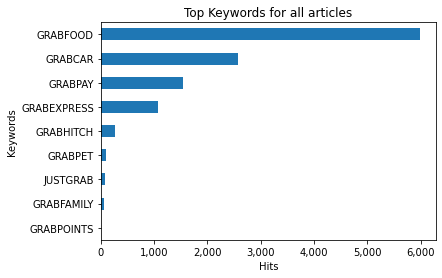

In [8]:
all_top_kw_list = np.concatenate(df['Keywords'].tolist())
all_top_kw_series = pd.Series(all_top_kw_list)
all_top_keywords = all_top_kw_series.value_counts().sort_values(ascending = True)

plot_all_top_keywords = all_top_keywords.plot.barh(
title = 'Top Keywords for all articles',
ylabel = 'Keywords'
)

plot_all_top_keywords.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Hits")

all_top_keywords

JUSTGRAB         1
GRABHITCH        1
GRABFAMILY      25
GRABPET         29
GRABEXPRESS    161
GRABCAR        251
GRABPAY        318
GRABFOOD       615
dtype: int64

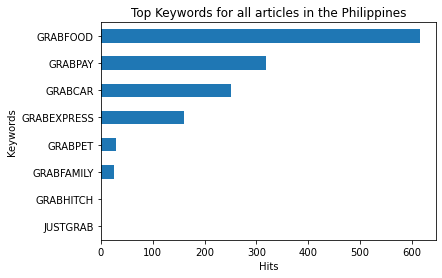

In [9]:
ph_top_kw_list = np.concatenate(df[df['Country']=='Philippines']['Keywords'].tolist())
ph_top_kw_series = pd.Series(ph_top_kw_list)
ph_top_keywords = ph_top_kw_series.value_counts().sort_values(ascending = True)

plot_ph_top_keywords = ph_top_keywords.plot.barh(
title = 'Top Keywords for all articles in the Philippines',
ylabel = 'Keywords'
)

plot_ph_top_keywords.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Hits")

ph_top_keywords

GRABPOINTS        2
GRABFAMILY       24
JUSTGRAB         61
GRABPET          62
GRABEXPRESS     119
GRABCAR         176
GRABHITCH       247
GRABPAY         978
GRABFOOD       2114
dtype: int64

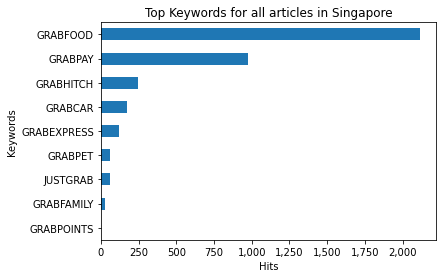

In [10]:
sg_top_kw_list = np.concatenate(df[df['Country']=='Singapore']['Keywords'].tolist())
sg_top_kw_series = pd.Series(sg_top_kw_list)
sg_top_keywords = sg_top_kw_series.value_counts().sort_values(ascending = True)

plot_sg_top_keywords = sg_top_keywords.plot.barh(
title = 'Top Keywords for all articles in Singapore',
ylabel = 'Keywords'
)

plot_sg_top_keywords.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Hits")

sg_top_keywords

GRABFAMILY        1
GRABPOINTS        5
GRABPET           7
GRABHITCH        21
JUSTGRAB         21
GRABPAY         237
GRABEXPRESS     788
GRABCAR        2141
GRABFOOD       3257
dtype: int64

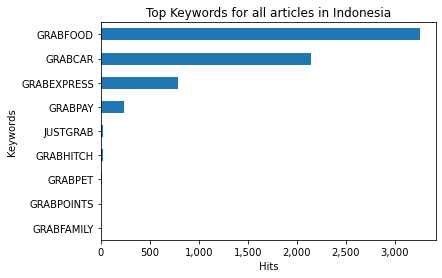

In [11]:
id_top_kw_list = np.concatenate(df[df['Country']=='Indonesia']['Keywords'].tolist())
id_top_kw_series = pd.Series(id_top_kw_list)
id_top_keywords = id_top_kw_series.value_counts().sort_values(ascending = True)

plot_id_top_keywords = id_top_keywords.plot.barh(
title = 'Top Keywords for all articles in Indonesia',
ylabel = 'Keywords'
)

plot_id_top_keywords.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Hits")

id_top_keywords

Positive                945
Negative                305
Neutral + Not Rated    9368
dtype: int64

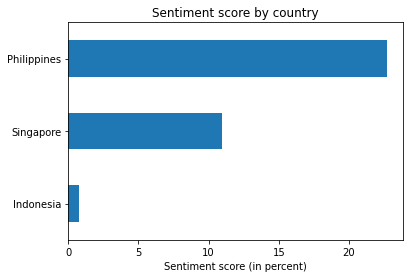

In [12]:
#  Source for sentiment score patterned on the formula on the saliency theory
#
#  https://kenbenoit.net/pdfs/Loweetal_2010_LSQ.pdf
#  pages 127-128
#

ph_df = df[df['Country']=='Philippines']
sg_df = df[df['Country']=='Singapore']
id_df = df[df['Country']=='Indonesia']

all_R = sum(df['Sentiment'] == 'Positive')
all_L = sum(df['Sentiment'] == 'Negative')
all_O = sum(df['Sentiment'] == 'Neutral') + sum(df['Sentiment'] == 'Not Rated') + all_L + all_R

all_sentiment_rating = (all_R - all_L) / all_O
#print(all_R,all_L,all_O)
#print(all_sentiment_rating)

ph_R = sum(ph_df['Sentiment'] == 'Positive')
ph_L = sum(ph_df['Sentiment'] == 'Negative')
ph_O = sum(ph_df['Sentiment'] == 'Neutral') + sum(ph_df['Sentiment'] == 'Not Rated') + ph_L + ph_R

ph_sentiment_rating = (ph_R - ph_L) / ph_O
#print(ph_R,ph_L,ph_O)
#print(ph_sentiment_rating)

sg_R = sum(sg_df['Sentiment'] == 'Positive')
sg_L = sum(sg_df['Sentiment'] == 'Negative')
sg_O = sum(sg_df['Sentiment'] == 'Neutral') + sum(sg_df['Sentiment'] == 'Not Rated') + sg_L + sg_R

sg_sentiment_rating = (sg_R - sg_L) / sg_O
#print(sg_R,sg_L,sg_O)
#print(sg_sentiment_rating)

id_R = sum(id_df['Sentiment'] == 'Positive')
id_L = sum(id_df['Sentiment'] == 'Negative')
id_O = sum(id_df['Sentiment'] == 'Neutral') + sum(id_df['Sentiment'] == 'Not Rated') + id_L + id_R

id_sentiment_rating = (id_R - id_L) / id_O
#print(id_R,id_L,id_O)
#print(id_sentiment_rating)

my_senti_list = [ph_sentiment_rating*100,sg_sentiment_rating*100,id_sentiment_rating*100]
my_senti_labels = ['Philippines','Singapore','Indonesia']
my_labels = ['Positive','Negative','Neutral + Not Rated']
all_list = [all_R,all_L,all_O]

senti_all = pd.Series(all_list,my_labels)

senti_score = pd.Series(my_senti_list,my_senti_labels).sort_values()

senti_score.plot.barh(
title = 'Sentiment score by country',
)

plot_id_top_keywords.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Sentiment score (in percent)")

senti_all

,Desktop Reach,Mobile Reach
January,"1,644,734","4,779,580"
February,"1,466,230","5,402,716"
March,"1,781,759","6,254,160"
April,"845,226","3,548,381"
May,"1,278,680","4,653,960"
June,"1,634,861","4,884,293"
July,"1,998,871","5,397,972"
August,"1,624,178","5,118,587"
September,"1,418,232","4,064,168"
October,"1,342,633","4,368,759"


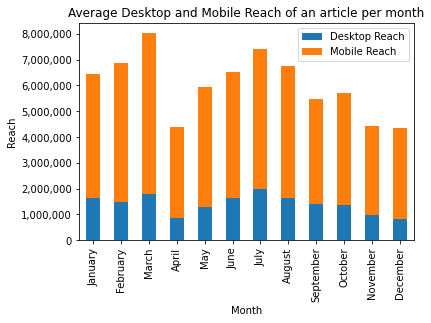

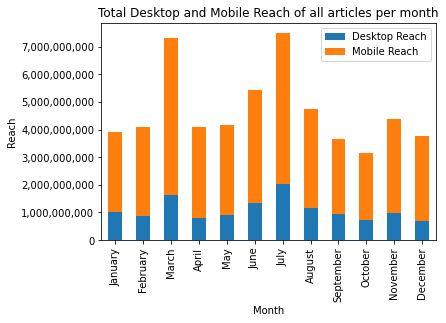

In [13]:
all_month_ave_reach = df.groupby(pd.Categorical(df['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Desktop Reach','Mobile Reach']]

plot_all_month_ave_reach = all_month_ave_reach.plot.bar(
title = 'Average Desktop and Mobile Reach of an article per month',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_all_month_ave_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

all_month_tot_reach = df.groupby(pd.Categorical(df['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Desktop Reach','Mobile Reach']]

plot_all_month_tot_reach = all_month_tot_reach.plot.bar(
title = 'Total Desktop and Mobile Reach of all articles per month',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_all_month_tot_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

all_month_tot_reach_styler1 = all_month_tot_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Desktop and Mobile Reach of all articles per month').format("{:,.0f}")

all_month_ave_reach_styler2 = all_month_ave_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Desktop and Mobile Reach of an article per month').format("{:,.0f}")

display_html(all_month_ave_reach_styler2._repr_html_()+' '+all_month_tot_reach_styler1._repr_html_(), raw=True)

,Desktop Reach,Mobile Reach
January,"306,725","560,317"
February,"302,052","522,157"
March,"454,546","774,518"
April,"136,338","741,162"
May,"382,876","828,728"
June,"226,212","528,649"
July,"297,973","691,352"
August,"290,539","630,905"
September,"240,297","575,074"
October,"289,716","756,900"


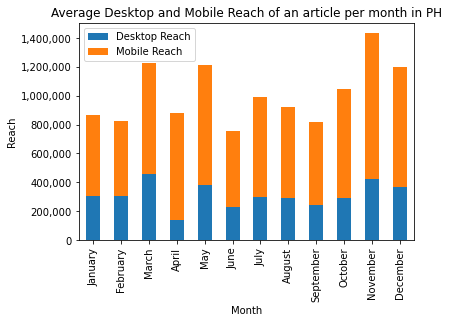

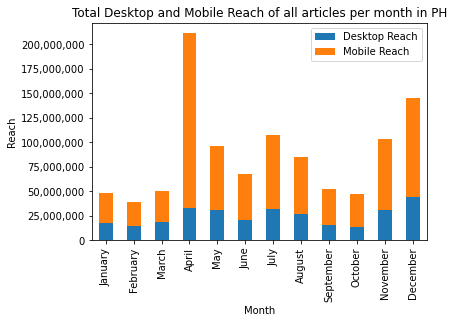

In [14]:
ph_month_ave_reach = df[df['Country']=='Philippines'].groupby(pd.Categorical(df[df['Country']=='Philippines']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Desktop Reach','Mobile Reach']]

plot_ph_month_ave_reach = ph_month_ave_reach.plot.bar(
title = 'Average Desktop and Mobile Reach of an article per month in PH',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_ph_month_ave_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ph_month_tot_reach = df[df['Country']=='Philippines'].groupby(pd.Categorical(df[df['Country']=='Philippines']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Desktop Reach','Mobile Reach']]

plot_ph_month_tot_reach = ph_month_tot_reach.plot.bar(
title = 'Total Desktop and Mobile Reach of all articles per month in PH',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_ph_month_tot_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ph_month_tot_reach_styler1 = ph_month_tot_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Desktop and Mobile Reach of all articles per month in PH').format("{:,.0f}")

ph_month_ave_reach_styler2 = ph_month_ave_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Desktop and Mobile Reach of an article per month in PH').format("{:,.0f}")

display_html(ph_month_ave_reach_styler2._repr_html_()+' '+ph_month_tot_reach_styler1._repr_html_(), raw=True)

,Desktop Reach,Mobile Reach
January,"381,544","554,012"
February,"360,091","640,560"
March,"391,582","701,637"
April,"286,898","467,611"
May,"479,871","834,967"
June,"415,711","784,960"
July,"456,889","873,756"
August,"521,749","987,928"
September,"446,225","899,134"
October,"437,579","1,283,472"


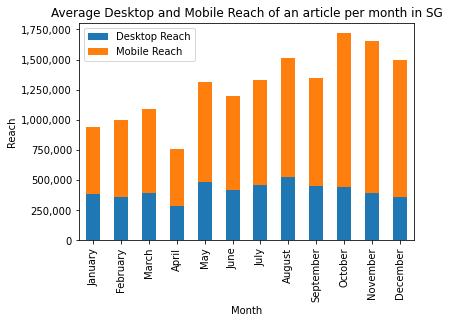

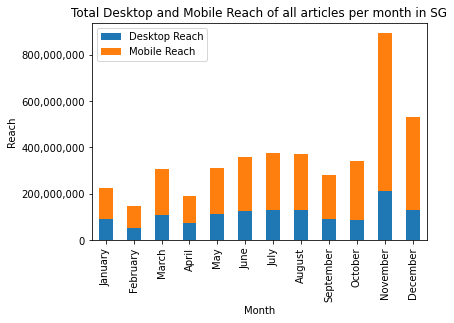

In [15]:
sg_month_ave_reach = df[df['Country']=='Singapore'].groupby(pd.Categorical(df[df['Country']=='Singapore']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Desktop Reach','Mobile Reach']]

plot_sg_month_ave_reach = sg_month_ave_reach.plot.bar(
title = 'Average Desktop and Mobile Reach of an article per month in SG',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_sg_month_ave_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sg_month_tot_reach = df[df['Country']=='Singapore'].groupby(pd.Categorical(df[df['Country']=='Singapore']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Desktop Reach','Mobile Reach']]

plot_sg_month_tot_reach = sg_month_tot_reach.plot.bar(
title = 'Total Desktop and Mobile Reach of all articles per month in SG',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_sg_month_tot_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sg_month_tot_reach_styler1 = sg_month_tot_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Desktop and Mobile Reach of all articles per month in SG').format("{:,.0f}")

sg_month_ave_reach_styler2 = sg_month_ave_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Desktop and Mobile Reach of an article per month in SG').format("{:,.0f}")

display_html(sg_month_ave_reach_styler2._repr_html_()+' '+sg_month_tot_reach_styler1._repr_html_(), raw=True)

,Desktop Reach,Mobile Reach
January,"2,856,738","8,788,016"
February,"2,004,072","7,702,868"
March,"2,533,735","9,270,044"
April,"1,548,805","6,828,501"
May,"1,946,609","7,753,849"
June,"2,751,694","8,561,861"
July,"2,995,782","8,273,645"
August,"2,706,355","9,044,997"
September,"2,119,154","6,290,505"
October,"2,080,686","6,888,044"


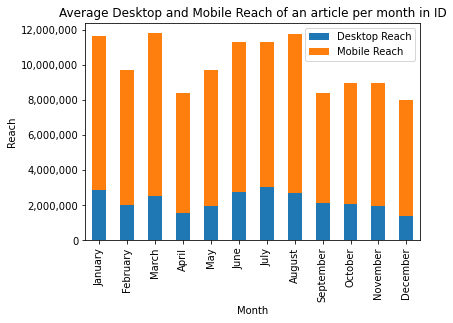

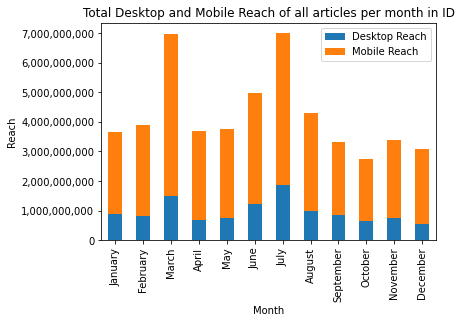

In [16]:
id_month_ave_reach = df[df['Country']=='Indonesia'].groupby(pd.Categorical(df[df['Country']=='Indonesia']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Desktop Reach','Mobile Reach']]

plot_id_month_ave_reach = id_month_ave_reach.plot.bar(
title = 'Average Desktop and Mobile Reach of an article per month in ID',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_id_month_ave_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

id_month_tot_reach = df[df['Country']=='Indonesia'].groupby(pd.Categorical(df[df['Country']=='Indonesia']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Desktop Reach','Mobile Reach']]

plot_id_month_tot_reach = id_month_tot_reach.plot.bar(
title = 'Total Desktop and Mobile Reach of all articles per month in ID',
stacked = True,
xlabel = 'Month',
ylabel = 'Reach',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_id_month_tot_reach.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

id_month_tot_reach_styler1 = id_month_tot_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Desktop and Mobile Reach of all articles per month in ID').format("{:,.0f}")

id_month_ave_reach_styler2 = id_month_ave_reach.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Desktop and Mobile Reach of an article per month in ID').format("{:,.0f}")

display_html(id_month_ave_reach_styler2._repr_html_()+' '+id_month_tot_reach_styler1._repr_html_(), raw=True)

,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo
January,3,164,0
February,3,155,0
March,16,164,0
April,3,415,0
May,3,238,0
June,6,181,0
July,8,176,0
August,17,503,0
September,2,105,0
October,2,693,0


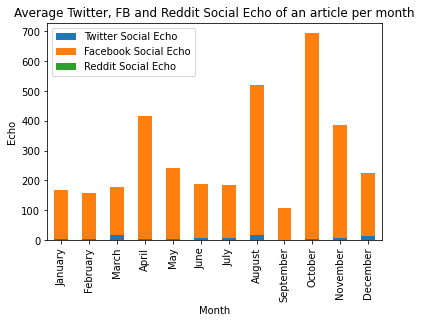

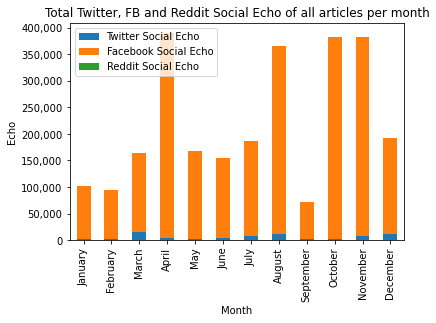

In [17]:
all_month_ave_echo = df.groupby(pd.Categorical(df['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_all_month_ave_echo = all_month_ave_echo.plot.bar(
title = 'Average Twitter, FB and Reddit Social Echo of an article per month',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_all_month_ave_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

all_month_tot_echo = df.groupby(pd.Categorical(df['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_all_month_tot_echo = all_month_tot_echo.plot.bar(
title = 'Total Twitter, FB and Reddit Social Echo of all articles per month',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_all_month_tot_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

all_month_tot_echo_styler1 = all_month_tot_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Twitter, FB and Reddit Social Echo of all articles per month').format("{:,.0f}")

all_month_ave_echo_styler2 = all_month_ave_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Twitter, FB and Reddit Social Echo of an article per month').format("{:,.0f}")

display_html(all_month_ave_echo_styler2._repr_html_()+' '+all_month_tot_echo_styler1._repr_html_(), raw=True)

,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo
January,2,78,0
February,3,398,0
March,4,"1,148",0
April,6,"1,440",0
May,4,"1,334",0
June,8,496,0
July,5,288,0
August,3,136,0
September,4,479,0
October,1,84,0


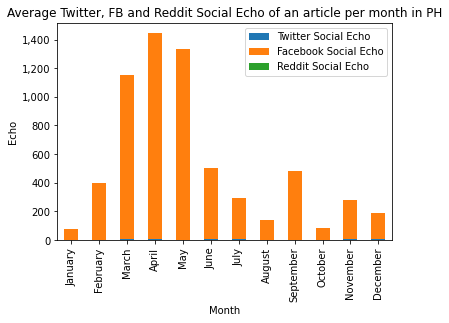

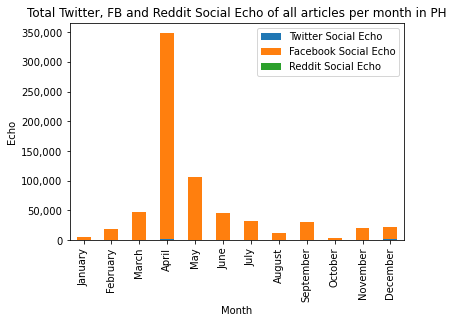

In [18]:
ph_month_ave_echo = df[df['Country']=='Philippines'].groupby(pd.Categorical(df[df['Country']=='Philippines']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_ph_month_ave_echo = ph_month_ave_echo.plot.bar(
title = 'Average Twitter, FB and Reddit Social Echo of an article per month in PH',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_ph_month_ave_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ph_month_tot_echo = df[df['Country']=='Philippines'].groupby(pd.Categorical(df[df['Country']=='Philippines']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_ph_month_tot_echo = ph_month_tot_echo.plot.bar(
title = 'Total Twitter, FB and Reddit Social Echo of all articles per month in PH',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_ph_month_tot_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ph_month_tot_echo_styler1 = ph_month_tot_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Twitter, FB and Reddit Social Echo of all articles per month in PH').format("{:,.0f}")

ph_month_ave_echo_styler2 = ph_month_ave_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Twitter, FB and Reddit Social Echo of an article per month in PH').format("{:,.0f}")

display_html(ph_month_ave_echo_styler2._repr_html_()+' '+ph_month_tot_echo_styler1._repr_html_(), raw=True)

,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo
January,2,345,0
February,2,251,0
March,46,284,0
April,2,73,0
May,2,203,0
June,8,251,0
July,16,225,0
August,45,130,0
September,1,131,0
October,1,142,0


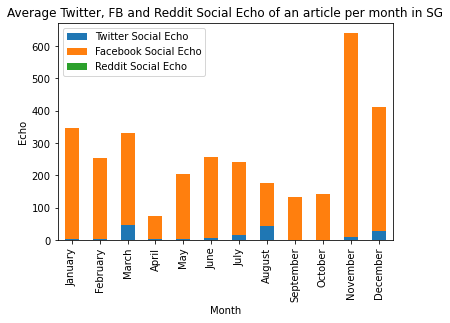

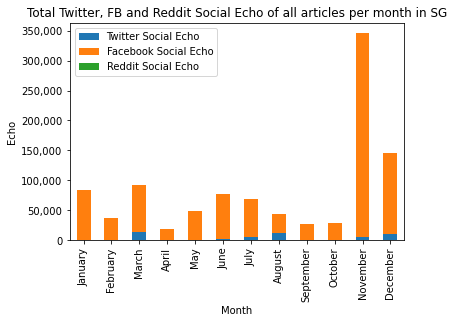

In [19]:
sg_month_ave_echo = df[df['Country']=='Singapore'].groupby(pd.Categorical(df[df['Country']=='Singapore']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_sg_month_ave_echo = sg_month_ave_echo.plot.bar(
title = 'Average Twitter, FB and Reddit Social Echo of an article per month in SG',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_sg_month_ave_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sg_month_tot_echo = df[df['Country']=='Singapore'].groupby(pd.Categorical(df[df['Country']=='Singapore']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_sg_month_tot_echo = sg_month_tot_echo.plot.bar(
title = 'Total Twitter, FB and Reddit Social Echo of all articles per month in SG',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_sg_month_tot_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sg_month_tot_echo_styler1 = sg_month_tot_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Twitter, FB and Reddit Social Echo of all articles per month in SG').format("{:,.0f}")

sg_month_ave_echo_styler2 = sg_month_ave_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Twitter, FB and Reddit Social Echo of an article per month in SG').format("{:,.0f}")

display_html(sg_month_ave_echo_styler2._repr_html_()+' '+sg_month_tot_echo_styler1._repr_html_(), raw=True)

,Twitter Social Echo,Facebook Social Echo,Reddit Social Echo
January,4,40,0
February,4,92,0
March,2,38,0
April,2,50,0
May,3,35,0
June,4,70,0
July,5,134,0
August,2,847,0
September,1,32,0
October,2,"1,138",0


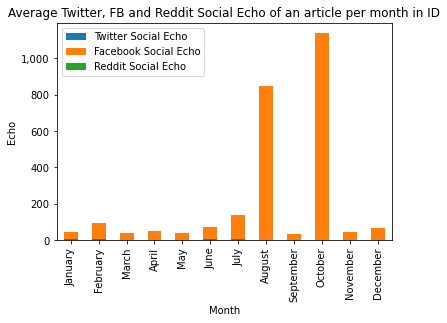

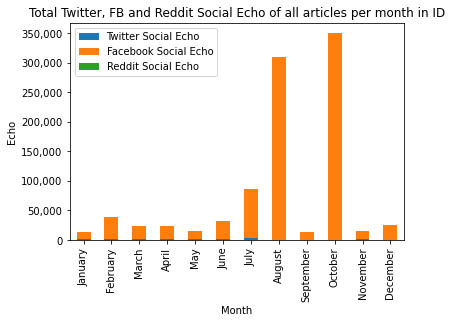

In [20]:
id_month_ave_echo = df[df['Country']=='Indonesia'].groupby(pd.Categorical(df[df['Country']=='Indonesia']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_id_month_ave_echo = id_month_ave_echo.plot.bar(
title = 'Average Twitter, FB and Reddit Social Echo of an article per month in ID',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_id_month_ave_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

id_month_tot_echo = df[df['Country']=='Indonesia'].groupby(pd.Categorical(df[df['Country']=='Indonesia']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['Twitter Social Echo','Facebook Social Echo','Reddit Social Echo']]

plot_id_month_tot_echo = id_month_tot_echo.plot.bar(
title = 'Total Twitter, FB and Reddit Social Echo of all articles per month in ID',
stacked = True,
xlabel = 'Month',
ylabel = 'Echo',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_id_month_tot_echo.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

id_month_tot_echo_styler1 = id_month_tot_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Twitter, FB and Reddit Social Echo of all articles per month in ID').format("{:,.0f}")

id_month_ave_echo_styler2 = id_month_ave_echo.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Twitter, FB and Reddit Social Echo of an article per month in ID').format("{:,.0f}")

display_html(id_month_ave_echo_styler2._repr_html_()+' '+id_month_tot_echo_styler1._repr_html_(), raw=True)

,AVE
January,"59,445"
February,"63,538"
March,"74,333"
April,"40,642"
May,"54,895"
June,"60,309"
July,"68,423"
August,"62,371"
September,"50,712"
October,"52,830"


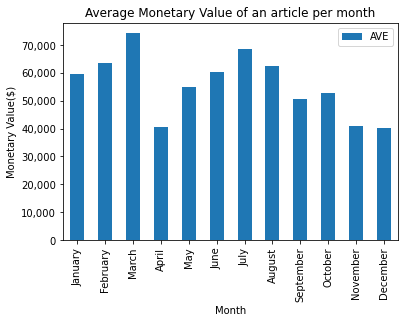

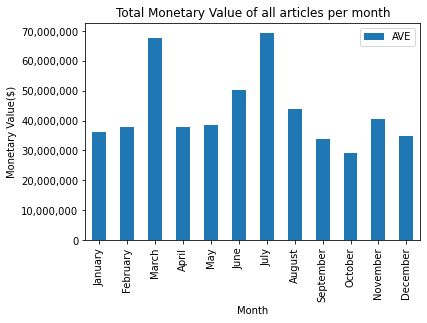

In [21]:
all_month_ave_AVE = df.groupby(pd.Categorical(df['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['AVE']]

plot_all_month_ave_AVE = all_month_ave_AVE.plot.bar(
title = 'Average Monetary Value of an article per month',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_all_month_ave_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

all_month_tot_AVE = df.groupby(pd.Categorical(df['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['AVE']]

plot_all_month_tot_AVE = all_month_tot_AVE.plot.bar(
title = 'Total Monetary Value of all articles per month',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_all_month_tot_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

all_month_tot_AVE_styler1 = all_month_tot_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Monetary Value of all articles per month').format("{:,.0f}")

all_month_ave_AVE_styler2 = all_month_ave_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Monetary Value of an article per month').format("{:,.0f}")

display_html(all_month_ave_AVE_styler2._repr_html_()+' '+all_month_tot_AVE_styler1._repr_html_(), raw=True)

,AVE
January,"8,021"
February,"7,624"
March,"11,375"
April,"8,121"
May,"11,207"
June,"6,982"
July,"9,151"
August,"8,523"
September,"7,542"
October,"9,681"


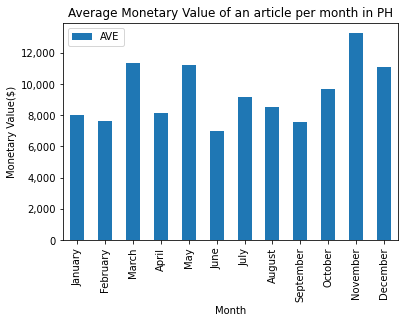

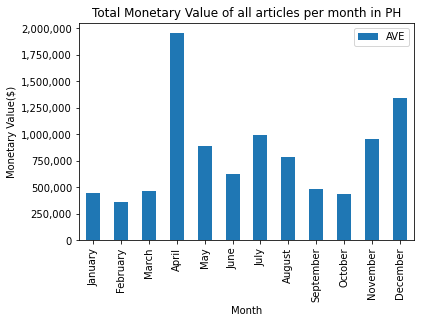

In [25]:
ph_month_ave_AVE = df[df['Country']=='Philippines'].groupby(pd.Categorical(df[df['Country']=='Philippines']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['AVE']]

plot_ph_month_ave_AVE = ph_month_ave_AVE.plot.bar(
title = 'Average Monetary Value of an article per month in PH',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_ph_month_ave_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ph_month_tot_AVE = df[df['Country']=='Philippines'].groupby(pd.Categorical(df[df['Country']=='Philippines']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['AVE']]

plot_ph_month_tot_AVE = ph_month_tot_AVE.plot.bar(
title = 'Total Monetary Value of all articles per month in PH',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_ph_month_tot_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ph_month_tot_AVE_styler1 = ph_month_tot_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Monetary Value of all articles per month in PH').format("{:,.0f}")

ph_month_ave_AVE_styler2 = ph_month_ave_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Monetary Value of an article per month in PH').format("{:,.0f}")

display_html(ph_month_ave_AVE_styler2._repr_html_()+' '+ph_month_tot_AVE_styler1._repr_html_(), raw=True)

,AVE
January,"8,683"
February,"9,256"
March,"10,112"
April,"6,979"
May,"12,162"
June,"11,106"
July,"12,309"
August,"13,965"
September,"12,445"
October,"15,920"


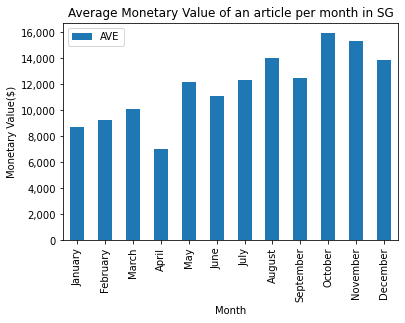

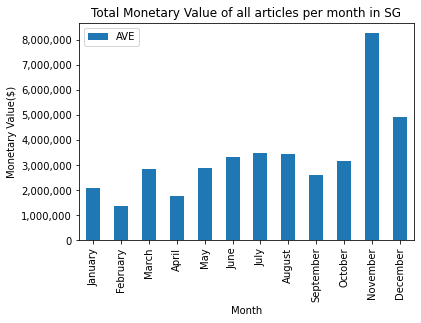

In [26]:
sg_month_ave_AVE = df[df['Country']=='Singapore'].groupby(pd.Categorical(df[df['Country']=='Singapore']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['AVE']]

plot_sg_month_ave_AVE = sg_month_ave_AVE.plot.bar(
title = 'Average Monetary Value of an article per month in SG',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_sg_month_ave_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sg_month_tot_AVE = df[df['Country']=='Singapore'].groupby(pd.Categorical(df[df['Country']=='Singapore']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['AVE']]

plot_sg_month_tot_AVE = sg_month_tot_AVE.plot.bar(
title = 'Total Monetary Value of all articles per month in SG',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_sg_month_tot_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

sg_month_tot_AVE_styler1 = sg_month_tot_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Monetary Value of all articles per month in SG').format("{:,.0f}")

sg_month_ave_AVE_styler2 = sg_month_ave_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Monetary Value of an article per month in SG').format("{:,.0f}")

display_html(sg_month_ave_AVE_styler2._repr_html_()+' '+sg_month_tot_AVE_styler1._repr_html_(), raw=True)

,AVE
January,"107,729"
February,"89,790"
March,"109,185"
April,"77,490"
May,"89,762"
June,"104,663"
July,"104,246"
August,"108,700"
September,"77,789"
October,"82,961"


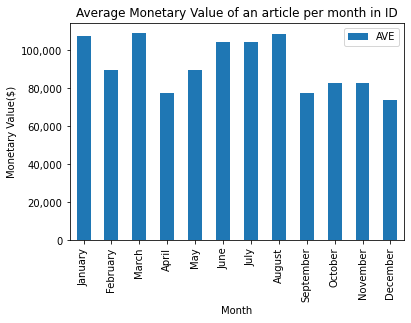

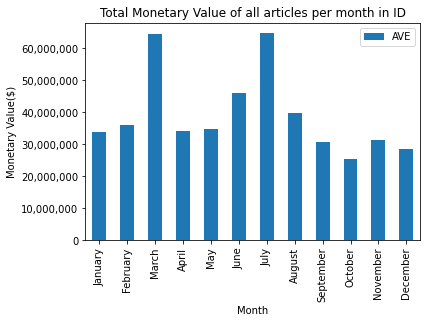

In [27]:
id_month_ave_AVE = df[df['Country']=='Indonesia'].groupby(pd.Categorical(df[df['Country']=='Indonesia']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).mean()[['AVE']]

plot_id_month_ave_AVE = id_month_ave_AVE.plot.bar(
title = 'Average Monetary Value of an article per month in ID',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_id_month_ave_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

id_month_tot_AVE = df[df['Country']=='Indonesia'].groupby(pd.Categorical(df[df['Country']=='Indonesia']['Date'].dt.month_name(), categories=month_names, 
    ordered=True)).sum()[['AVE']]

plot_id_month_tot_AVE = id_month_tot_AVE.plot.bar(
title = 'Total Monetary Value of all articles per month in ID',
stacked = True,
xlabel = 'Month',
ylabel = 'Monetary Value($)',
)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plot_id_month_tot_AVE.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

id_month_tot_AVE_styler1 = id_month_tot_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Total Monetary Value of all articles per month in ID').format("{:,.0f}")

id_month_ave_AVE_styler2 = id_month_ave_AVE.style.set_table_attributes("style='display:inline'").set_caption(
    'Average Monetary Value of an article per month in ID').format("{:,.0f}")

display_html(id_month_ave_AVE_styler2._repr_html_()+' '+id_month_tot_AVE_styler1._repr_html_(), raw=True)

In [29]:
#pop = pd.read_html('https://en.wikipedia.org/wiki/Southeast_Asia')
#SEApop = pop[1][['State','Population(2020)[16]']].drop([0,1,2,4,5,6,9,10], axis = 0)
#print(df['Date'].values)

In [31]:
#SEApop_plot = SEApop.set_index('State').plot.barh(
#title = 'Population in PH, SG and ID',
#figsize =(8,8)
#)
#
#plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
#SEApop_plot.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [32]:
from datetime import datetime, timedelta
fformat = '%H:%M:%S.%f'
time = (datetime.strptime("00:00:00.000000",fformat) - timedelta(hours=9, minutes=0, seconds=0, microseconds =0)).time()
print(str(time)[-3:])

:00


In [33]:
pd.to_datetime('15:00:00.000000', format = fformat)

Timestamp('1900-01-01 15:00:00')